# Package Instalation

In [1]:
!uv add langgraph langchain langsmith python-dotenv langchain_ollama langchain_community

Resolved 135 packages in 1ms
Audited 130 packages in 0.09ms


In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

### Integration with LLM using OLLAMA

In [4]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:latest", temperature=0)
llm

ChatOllama(model='llama3.2:latest', temperature=0.0)

In [5]:
## Node functionality
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [6]:
graph_builder=StateGraph(State)

## Adding Node
graph_builder.add_node("llmchatbot", chatbot)

## Adding Edges
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

## Compile the graph
graph=graph_builder.compile()

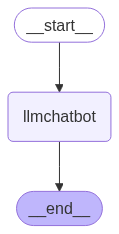

In [7]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

#### GET response from LLM

In [8]:
response=graph.invoke({"messages":"Hello"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

How can I assist you today?


In [9]:
response["messages"][-1].content

'How can I assist you today?'

#### Stream LLM Response

In [10]:
for event in graph.stream({"messages":"Hi, How are you?"}):
    print(event)

{'llmchatbot': {'messages': [AIMessage(content="I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'model': 'llama3.2:latest', 'created_at': '2025-06-23T12:48:36.749058867Z', 'done': True, 'done_reason': 'stop', 'total_duration': 9689317917, 'load_duration': 41476587, 'prompt_eval_count': 31, 'prompt_eval_duration': 1073339211, 'eval_count': 47, 'eval_duration': 8573395380, 'model_name': 'llama3.2:latest'}, id='run--9ef7f9d3-913e-456d-af6c-aeb17df6f4be-0', usage_metadata={'input_tokens': 31, 'output_tokens': 47, 'total_tokens': 78})]}}
